In [1]:
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
carpeta = os.getcwd()+'/'

G = nx.read_gml(carpeta+'dolphins.gml')

gender = pd.read_csv(carpeta+'dolphinsGender.txt', sep='\t', header=None)
delfines = gender[0] # nombres de delfines (nodos)
genero = gender[1]   # genero de los delfines en el mismo orden que los nodos

# A cada uno de los nodos ya existentes en el grafo, se le agrega el genero
for d,g in zip(delfines,genero):
    G.add_node(d, gender=g)

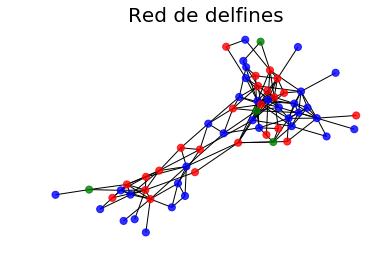

In [3]:
pos = nx.spring_layout(G)

#Nodos
nx.draw_networkx_nodes(G,pos,nodelist=G.nodes(),node_color=["blue" if g=="m" else "red" if g=="f" else "green" for g in nx.get_node_attributes(G, "gender").values()],with_labels=False,node_size=50,alpha=0.8)

#Enlaces
nx.draw_networkx_edges(G,pos,width=1.0,alpha=1)

#Etiquetas
plt.title('Red de delfines',fontsize=20)
plt.axis('off')
plt.show()

In [4]:
com = nx.algorithms.community.centrality.girvan_newman(G)
a = [node for node in com] #lista de comunidades

In [35]:
# Diccionario con enlaces y correspondiente edge betweenness
eb = nx.edge_betweenness_centrality(G)

# Lista de enlaces ordenada por edge betweenness de mayor a menor
eb_orden=sorted(eb, key=eb.__getitem__,reverse=True)

# Con esto puedo saber el orden en que se fueron eliminando los enlaces, por ejemplo para graficarlos
# NO, porque lo recalcula cada vez!

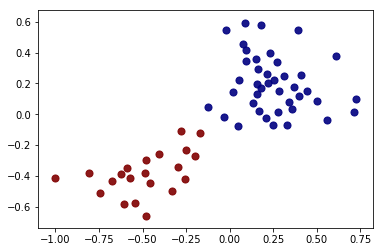

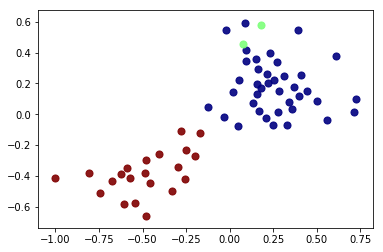

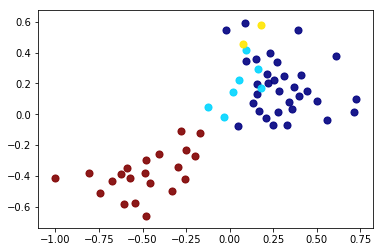

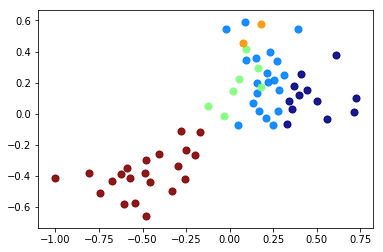

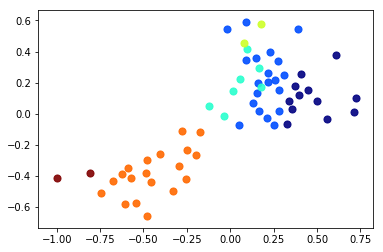

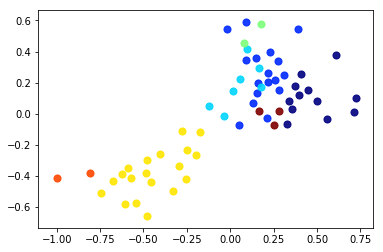

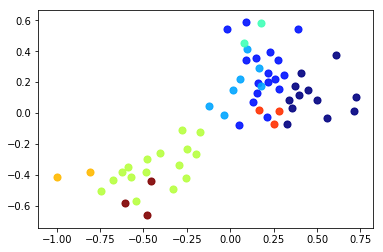

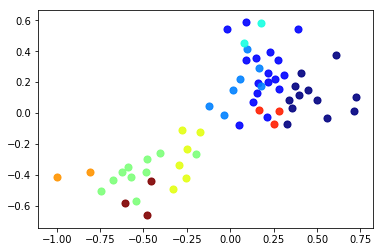

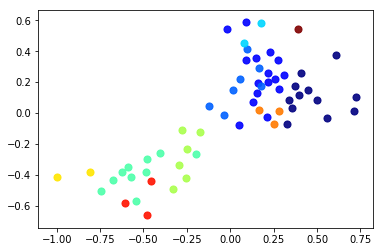

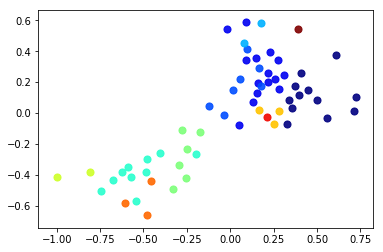

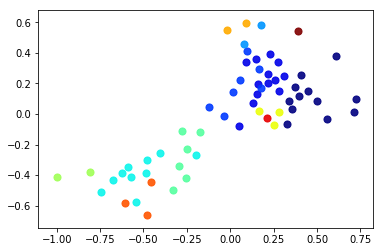

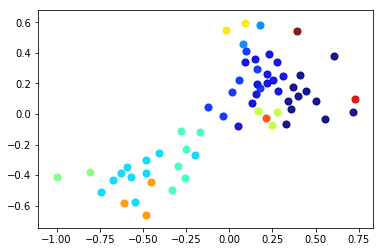

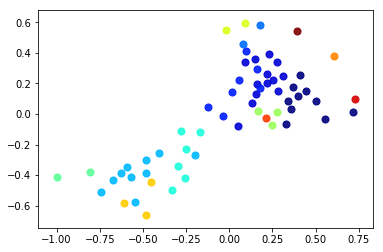

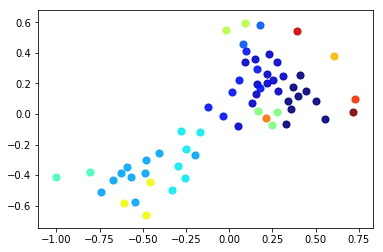

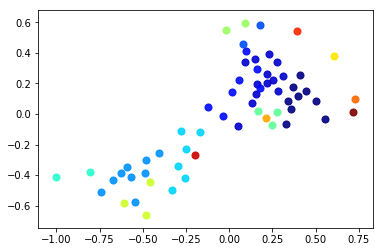

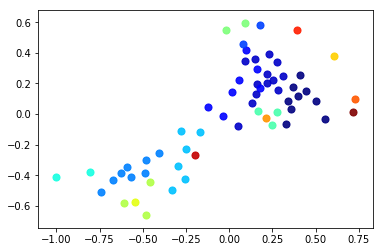

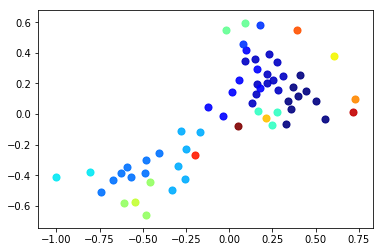

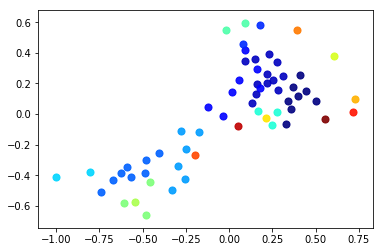

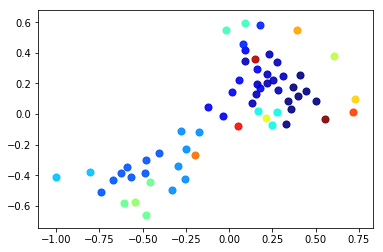

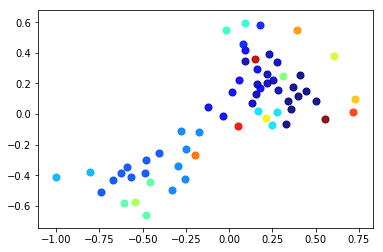

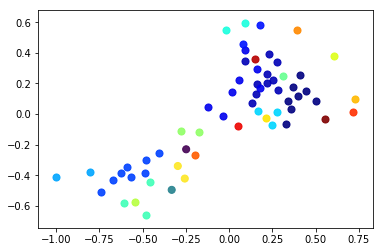

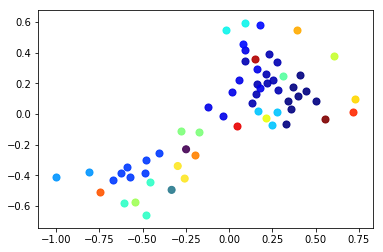

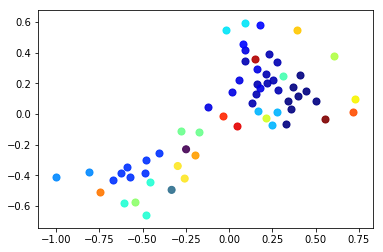

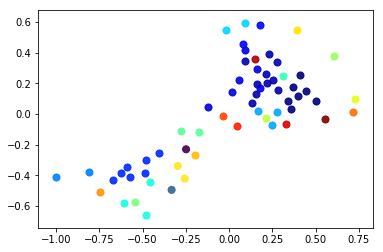

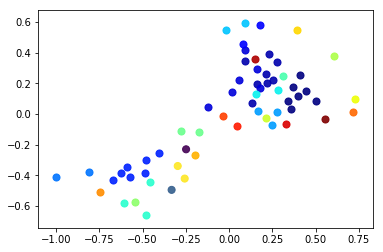

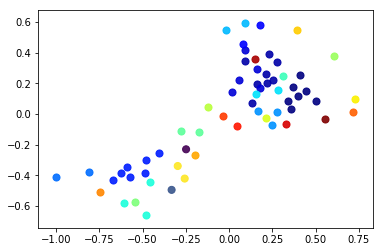

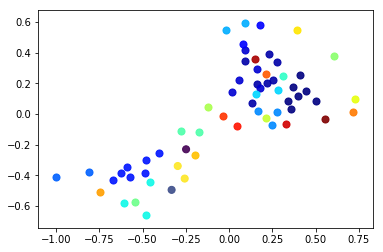

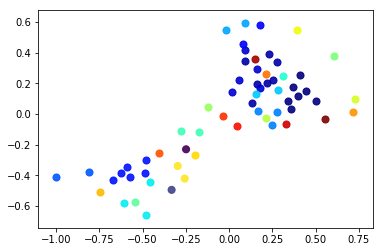

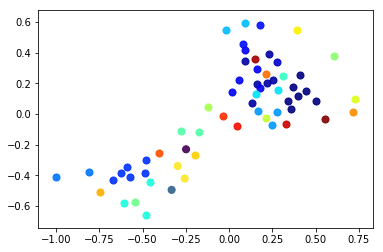

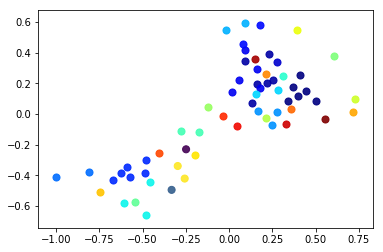

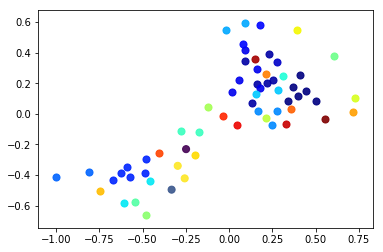

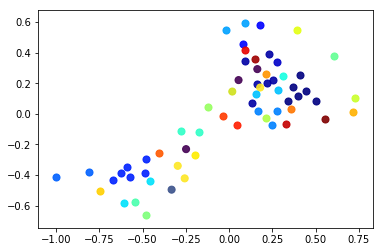

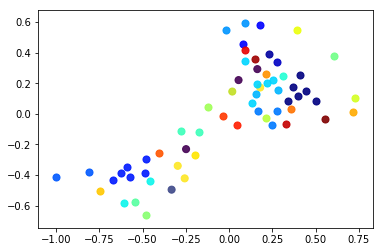

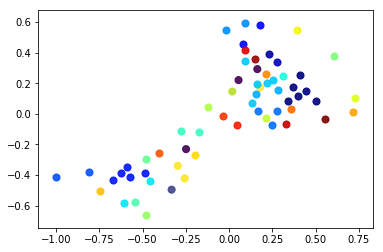

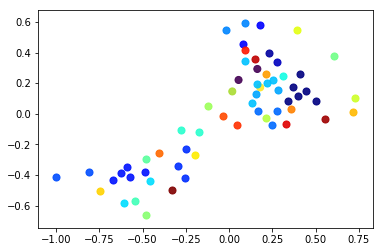

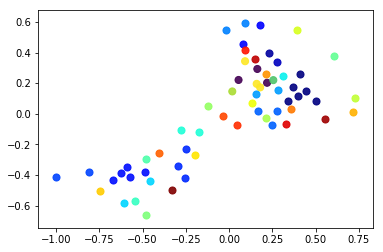

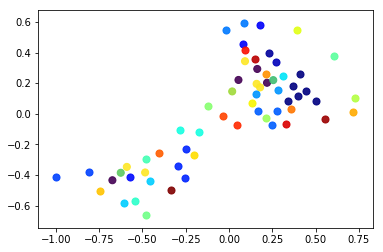

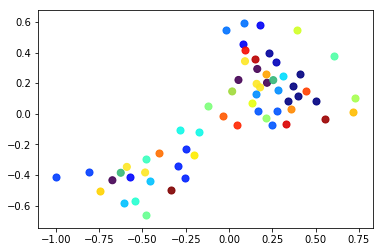

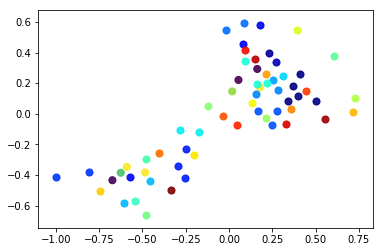

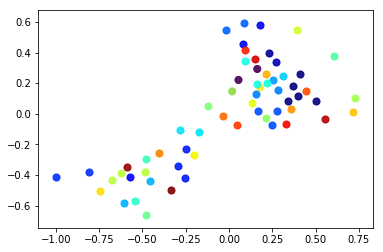

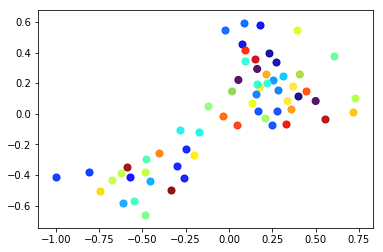

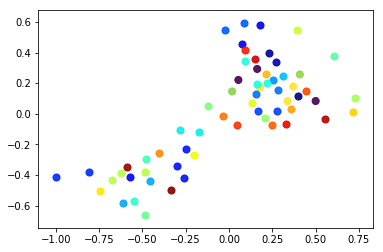

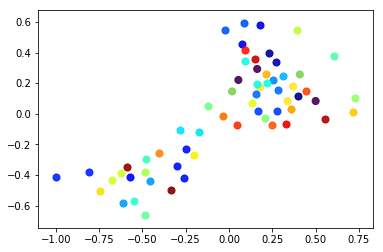

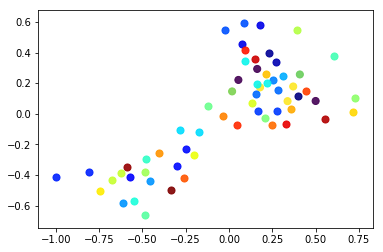

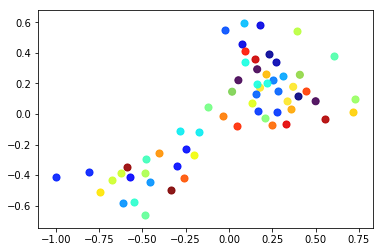

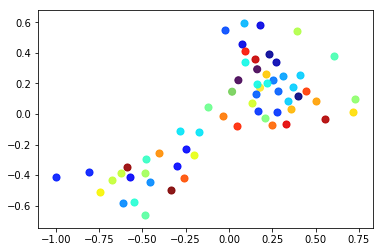

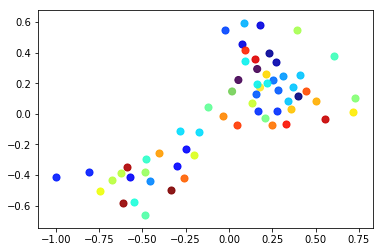

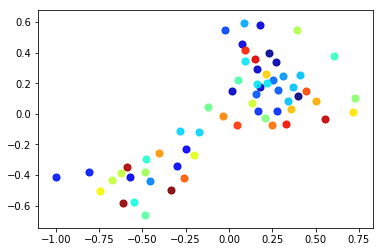

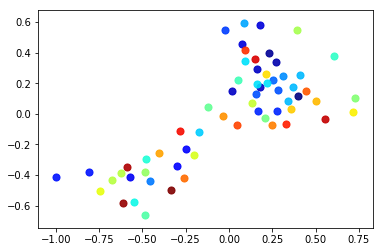

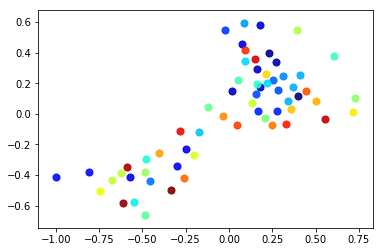

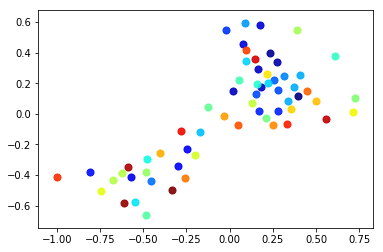

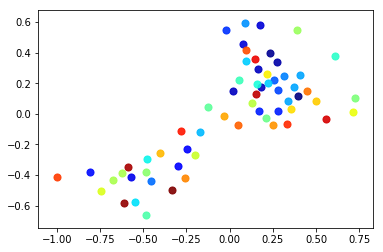

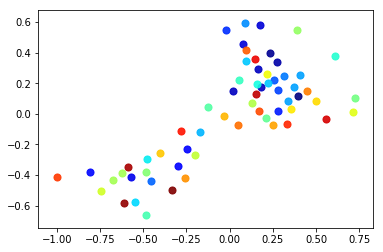

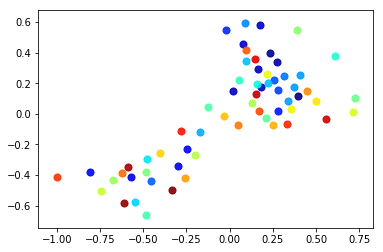

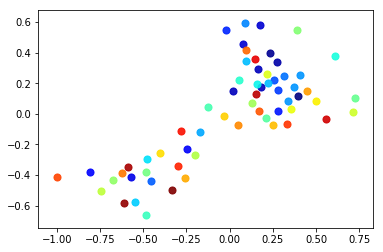

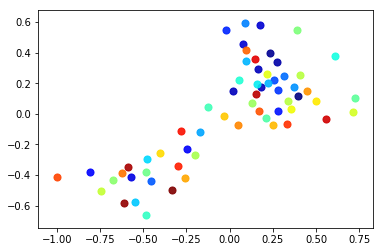

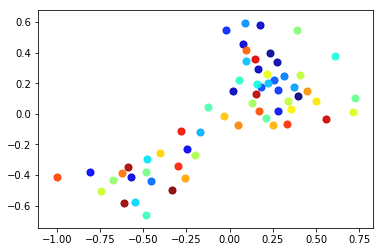

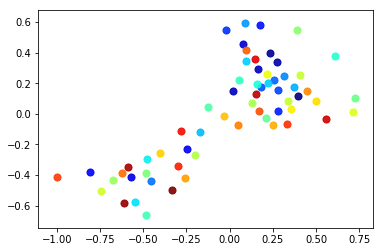

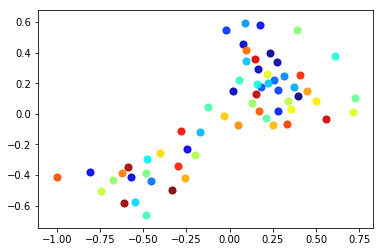

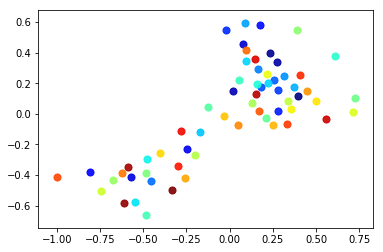

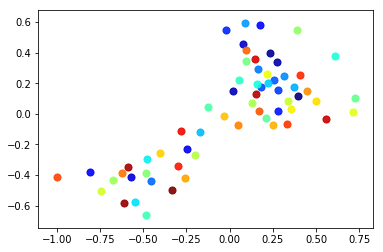

In [34]:
# Para graficar las comunidades por colores, sin enlaces (o con todos los enlaces)
import time
from matplotlib import cm

it = len(a) # Cantidad de "pasos" de division

for j in range(it):
    coms = a[j]
    N = len(coms) # Cantidad de nodos en la comunidad
    colores_com = np.linspace(0,1,N) # quiero N colores, uno por comunidad
    colores = [ cm.jet(x) for x in colores_com ] # transformo en colores del colormap
    for i in range(N):
        nx.draw_networkx_nodes(G,pos,nodelist=coms[i],
                               node_color=colores[i],with_labels=False,node_size=50,alpha=0.8)
    plt.show()
    #time.sleep(0.6) #si lo escribiera para que se superponga en un unico grafico

# colormaps que se ven bien: plasma, gist_rainbow, jet

In [ ]:
# Para animarlo? REVISAR
from matplotlib import animation

fig = plt.figure()

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,
init = 

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=60, interval=100, blit=True)

# Creo que no hay que usar func animation.
# https://matplotlib.org/api/_as_gen/matplotlib.animation.Animation.html#matplotlib.animation.Animation

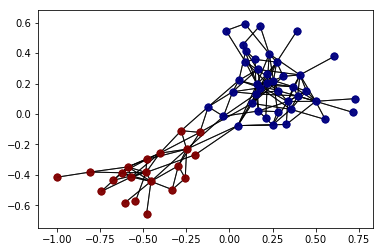

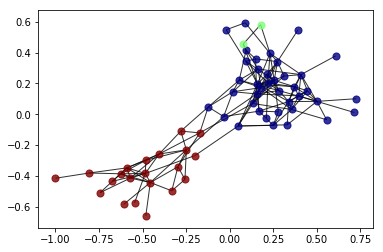

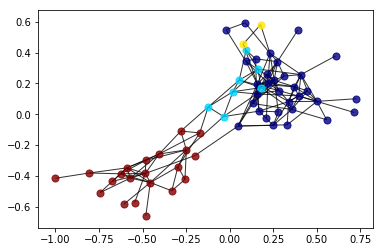

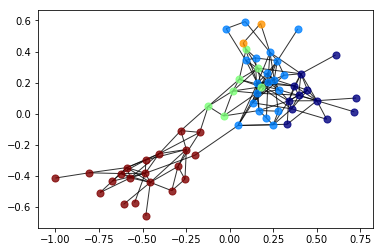

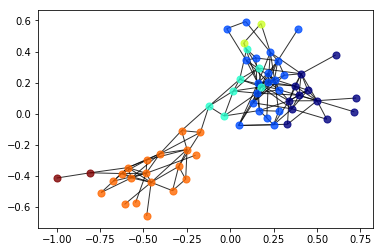

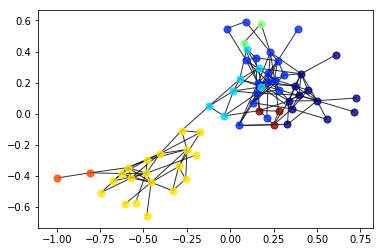

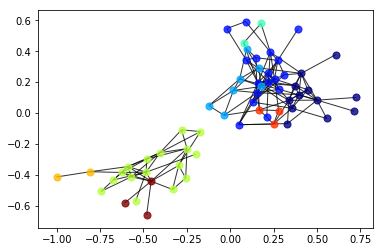

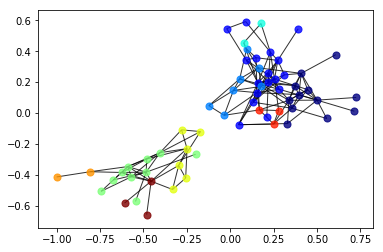

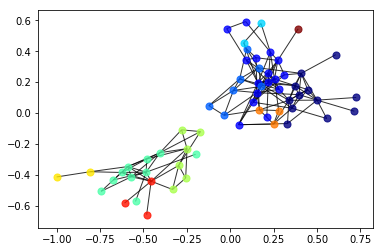

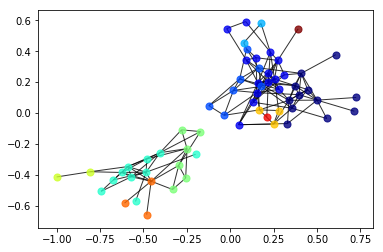

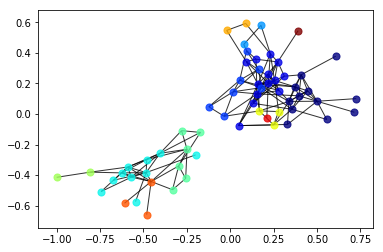

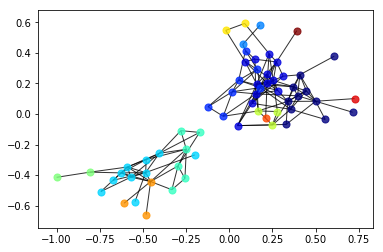

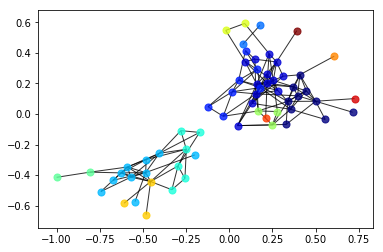

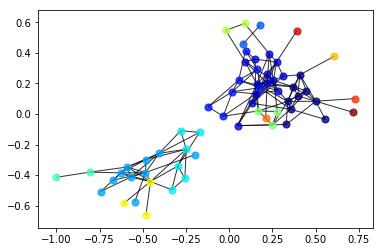

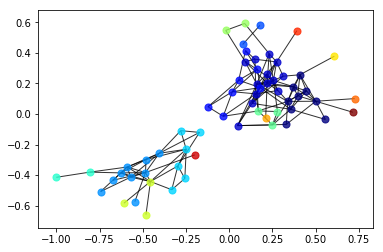

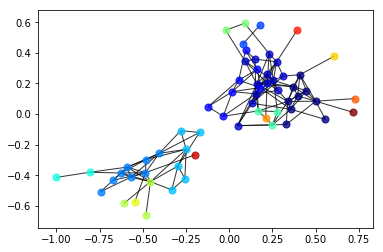

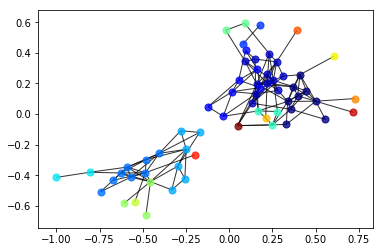

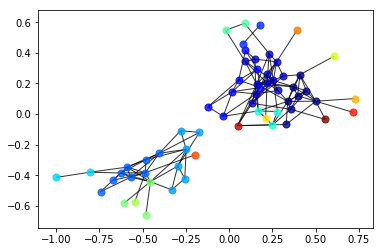

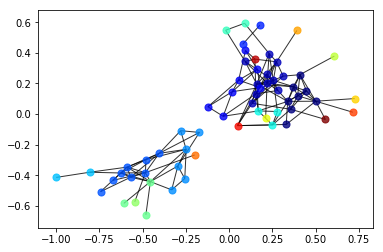

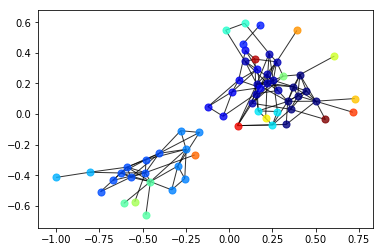

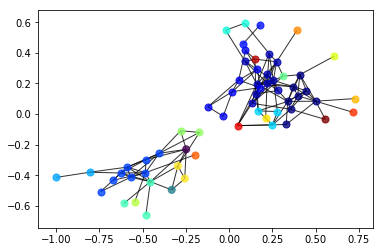

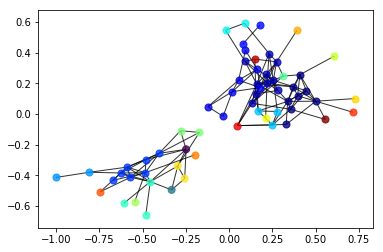

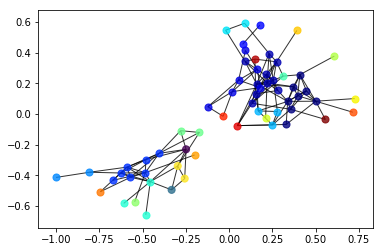

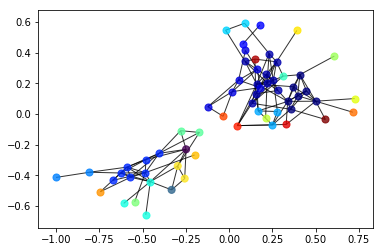

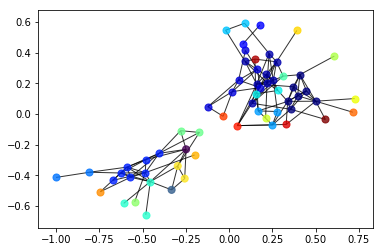

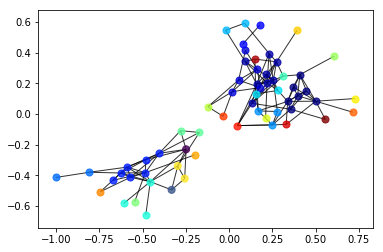

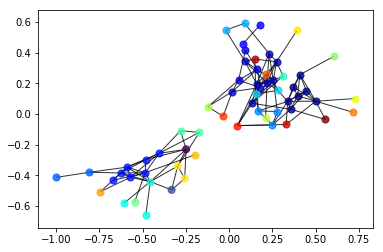

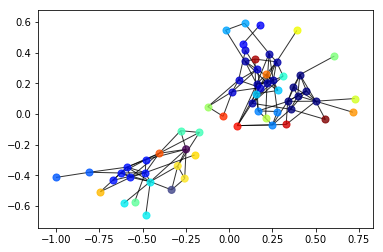

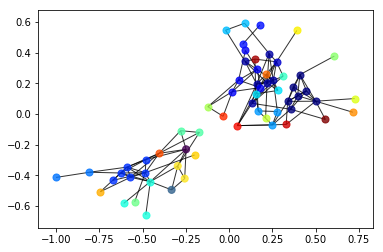

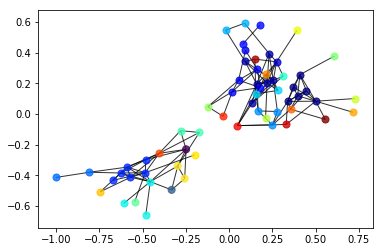

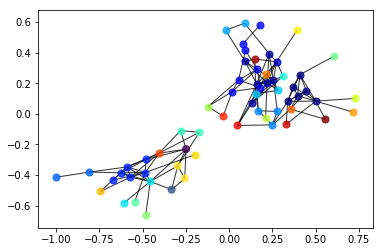

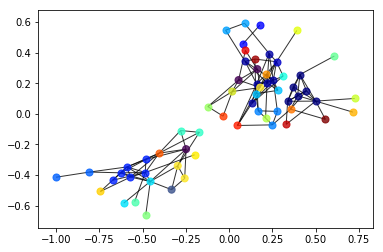

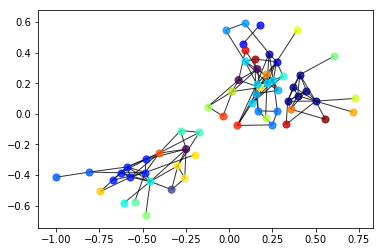

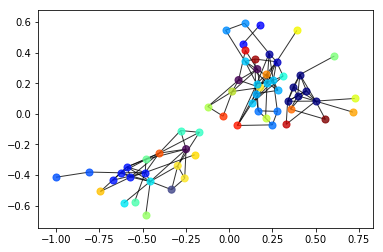

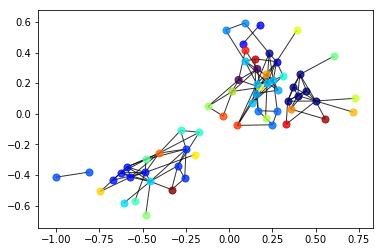

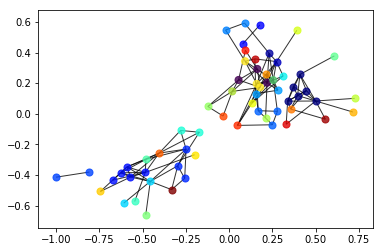

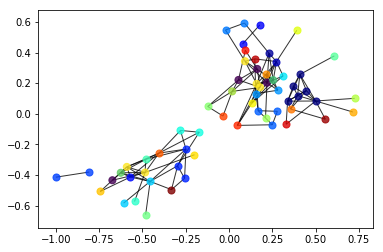

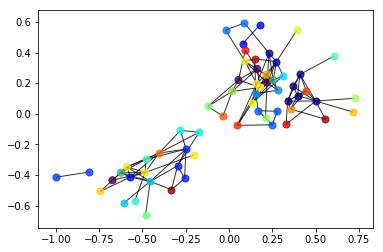

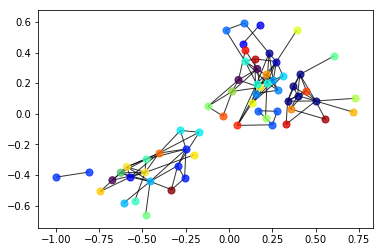

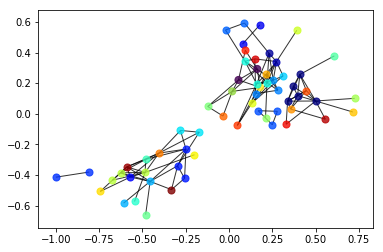

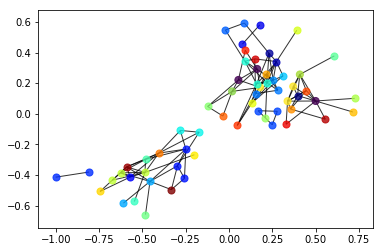

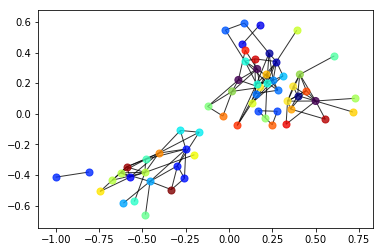

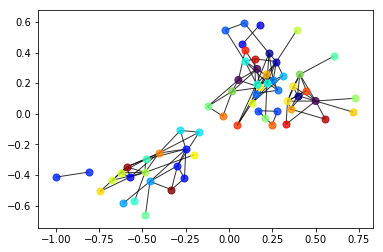

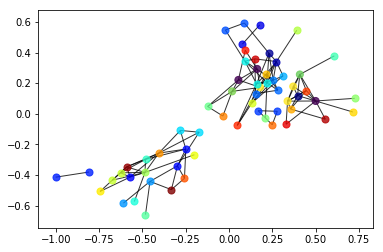

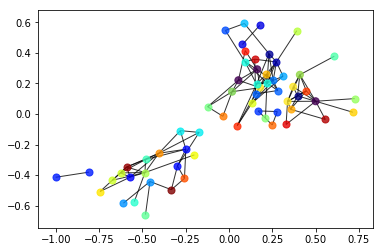

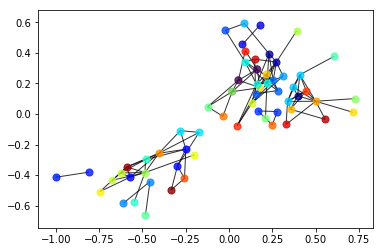

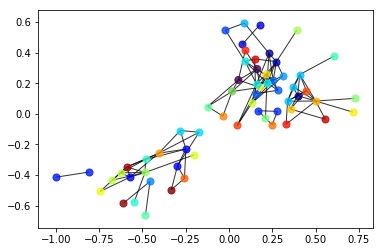

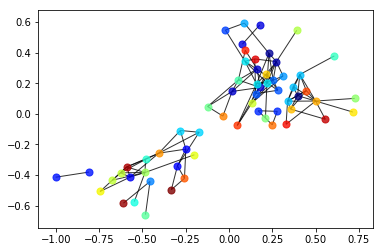

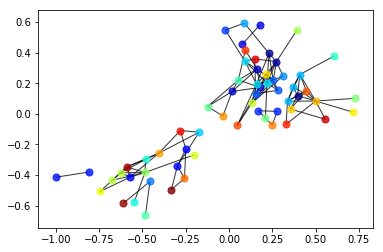

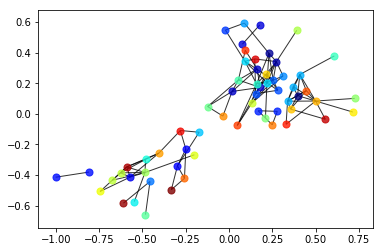

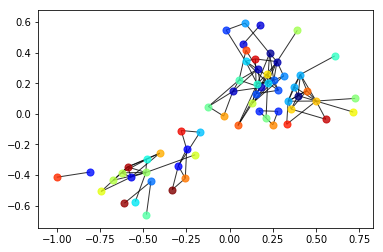

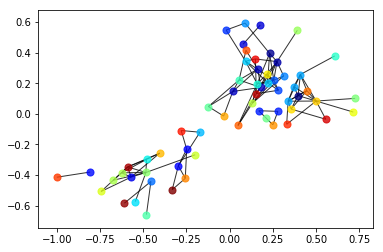

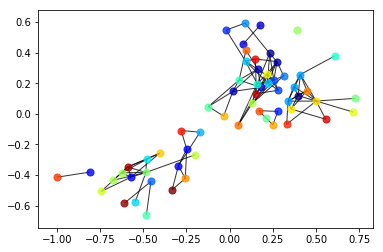

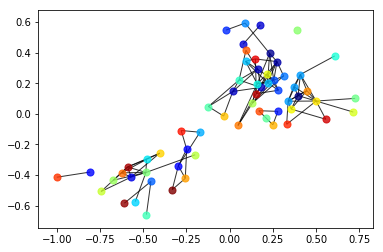

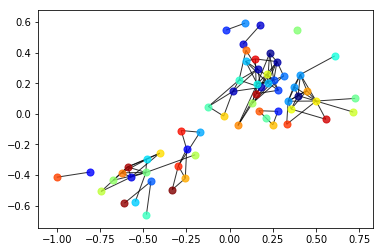

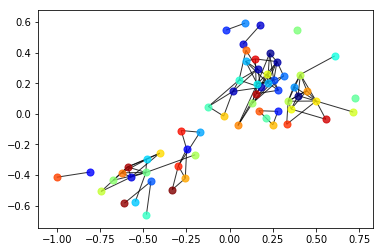

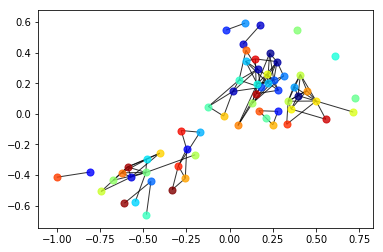

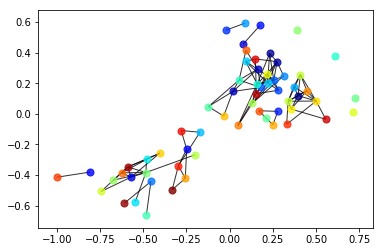

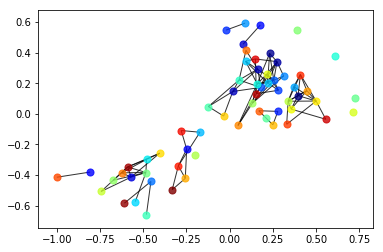

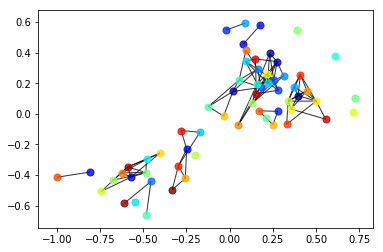

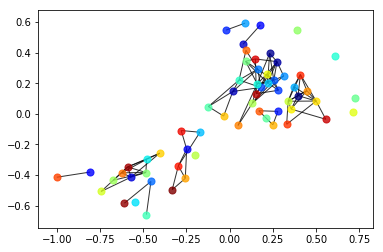

In [54]:
# Para graficar las comunidades por colores, eliminando enlaces
G_copy = nx.read_gml(carpeta+'dolphins.gml')

for d,g in zip(delfines,genero):
    G_copy.add_node(d, gender=g)

it = len(a)

for j in range(it):
    coms = a[j]
    N = len(coms)
    colores_com = np.linspace(0,1,N)
    colores = [ cm.jet(x) for x in colores_com ]
    enlaces = list(G_copy.edges())
    for i in range(N):
        nx.draw_networkx_nodes(G_copy,pos,nodelist=coms[i],
                               node_color=colores[i],with_labels=False,node_size=50,alpha=0.8)
    nx.draw_networkx_edges(G_copy,pos,edgelist=enlaces,alpha=0.8)
    eb = nx.edge_betweenness_centrality(G_copy)
    eb_orden=sorted(eb, key=eb.__getitem__,reverse=True)
    G_copy.remove_edge(*eb_orden[0])
    plt.show()

# Es màs complicado, si edge betweennes es igual, elimina todos